In [9]:
# Housing Price Prediction Overview

In [158]:
#Import required Python libraries
import pandas as pd # For handling datasets (tables)
import numpy as np # For math operations
import matplotlib.pyplot as plt # For plotting charts
import seaborn as sns # For making better-looking charts
#pip install pandas
#pip install numpy
#pip install matplotlib
#pip install seaborn
#pip install scikit-learn

In [159]:
# STEP 2: Load the dataset
data = pd.read_csv("Housing.csv") ## Read CSV file into a DataFrame
data.head()  # Show first 5 rows

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [160]:
data.info() ## Show basic info about data (columns, types, missing values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [161]:
data.describe() # Show basic statistics (mean, min, max, etc.)

price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

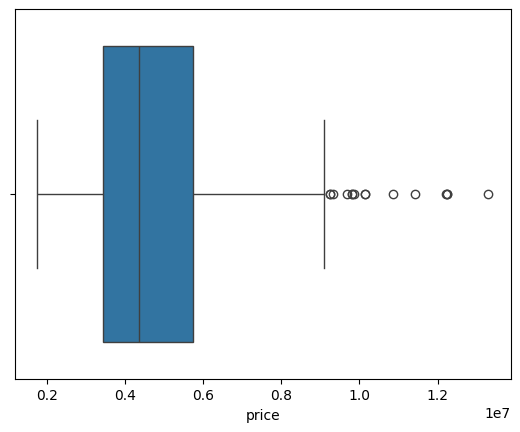

In [149]:
#Visualize price and area distribution
box = sns.boxplot(x=data['price']) # Boxplot for price

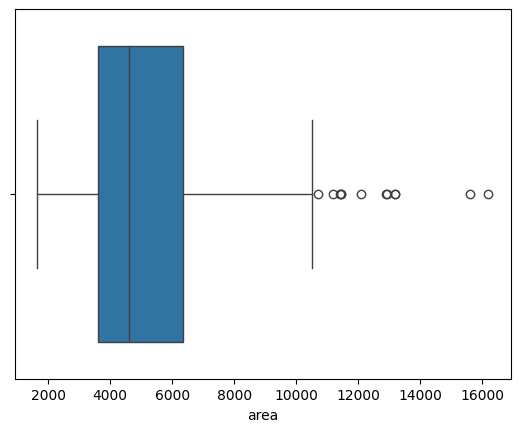

In [150]:
box = sns.boxplot(x=data['area']) # Boxplot for area

In [121]:
# Log transform price and area to reduce skewness
data['log_price'] = np.log(data['price'])
data['log_area'] = np.log(data['area'])

# Detect outliers in log_price and log_area using IQR method and remove them
Q1_price = data['log_price'].quantile(0.25) ## 25% value
Q3_price = data['log_price'].quantile(0.75) # 75% value
IQR_price = Q3_price - Q1_price # Interquartile range
lower_price = Q1_price - 1.5 * IQR_price # Interquartile range
upper_price = Q3_price + 1.5 * IQR_price # Upper bound

#Detect outliers for area
Q1_area = data['log_area'].quantile(0.25)
Q3_area = data['log_area'].quantile(0.75)
IQR_area = Q3_area - Q1_area
lower_area = Q1_area - 1.5 * IQR_area
upper_area = Q3_area + 1.5 * IQR_area

#Combine outlier conditions
outliers = (data['log_price'] < lower_price) | (data['log_price'] > upper_price) | \
           (data['log_area'] < lower_area) | (data['log_area'] > upper_area)

print(f"Removing {outliers.sum()} outliers") # Show how many outliers found

# Remove outlier rows
data = data[~outliers] 

# Replace original price and area with log-transformed versions
data['price'] = data['log_price']
data['area'] = data['log_area']

# Drop temporary log columns
data.drop(columns=['log_price', 'log_area'], inplace=True)

Removing 3 outliers


In [122]:
data.head()

price      area  bedrooms  bathrooms  stories mainroad guestroom  \
1  16.321036  9.100526         4          4        4      yes        no   
2  16.321036  9.206332         3          2        2      yes        no   
3  16.318175  8.922658         4          2        2      yes        no   
4  16.250001  8.911934         4          1        2      yes       yes   
5  16.199676  8.922658         3          3        1      yes        no   

  basement hotwaterheating airconditioning  parking prefarea furnishingstatus  
1       no              no             yes        3       no        furnished  
2      yes              no              no        2      yes   semi-furnished  
3      yes              no             yes        3      yes        furnished  
4      yes              no             yes        2       no        furnished  
5      yes              no             yes        2      yes   semi-furnished

In [162]:
# Check unique values in furnishingstatus
print("Furnishing Status values:", data['furnishingstatus'].unique())

Furnishing Status values: ['furnished' 'semi-furnished' 'unfurnished']


In [163]:
# Check missing values
print("Missing values:\n",data.isnull().sum())

Missing values:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [125]:
#Create a new column: price per area
data['price_per_area'] = data['price'] / data['area']

In [164]:
# Convert Yes/No columns into 1/0 (binary)
data['mainroad'] = data['mainroad'].map({'yes':1, 'no':0})
data['guestroom'] = data['guestroom'].map({'yes':1, 'no':0})
data['basement'] = data['basement'].map({'yes':1, 'no':0})
data['hotwaterheating'] = data['hotwaterheating'].map({'yes':1, 'no':0})
data['airconditioning'] = data['airconditioning'].map({'yes':1, 'no':0})
data['prefarea'] = data['prefarea'].map({'yes':1, 'no':0})

In [127]:
# Create a new column counting amenities
data['amenity_count'] = data['mainroad'] + data['guestroom'] + data['basement'] + data['hotwaterheating'] + data['airconditioning'] + data['prefarea']

In [153]:
data.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

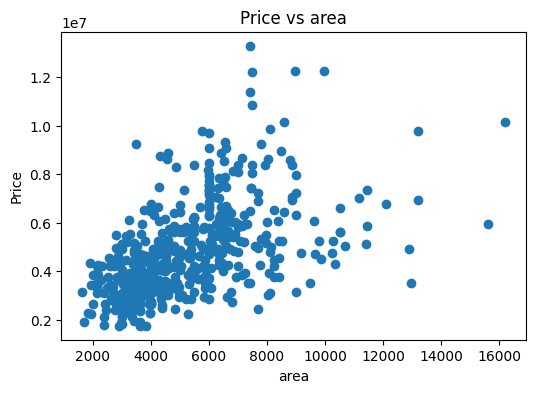

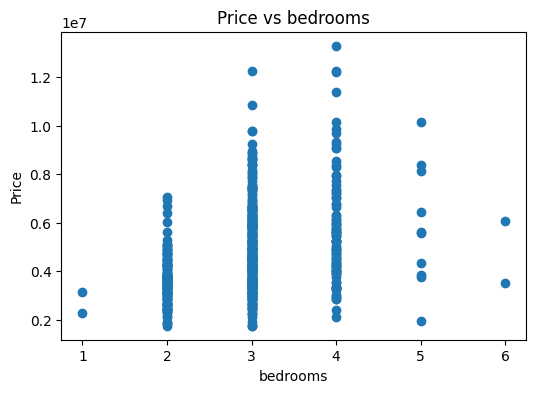

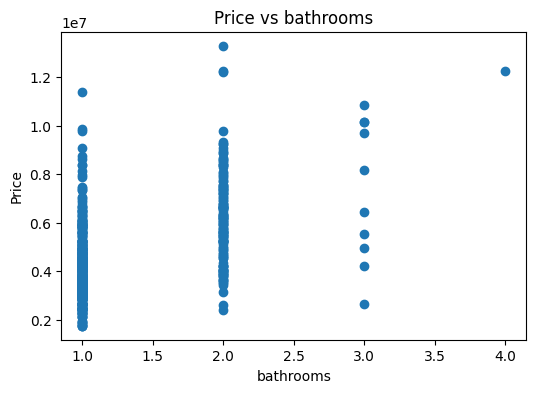

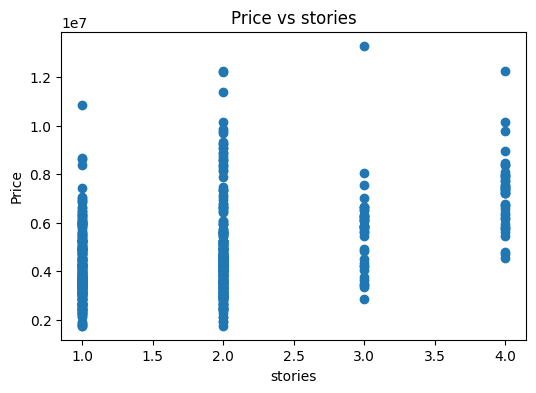

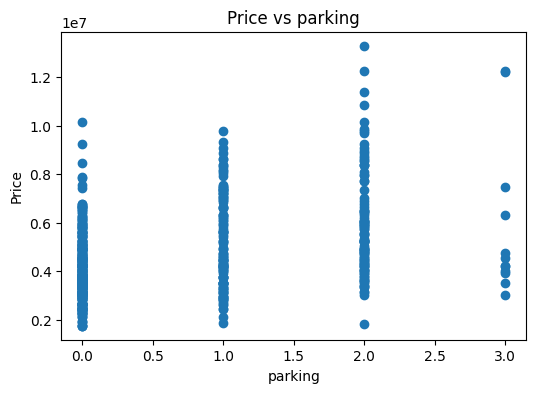

In [165]:
# Make scatter plots to see relationships
scatterplot = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for feature in scatterplot:
    plt.figure(figsize=(6,4))
    plt.scatter(data[feature], data['price'])
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.title(f'Price vs {feature}')
    plt.show()

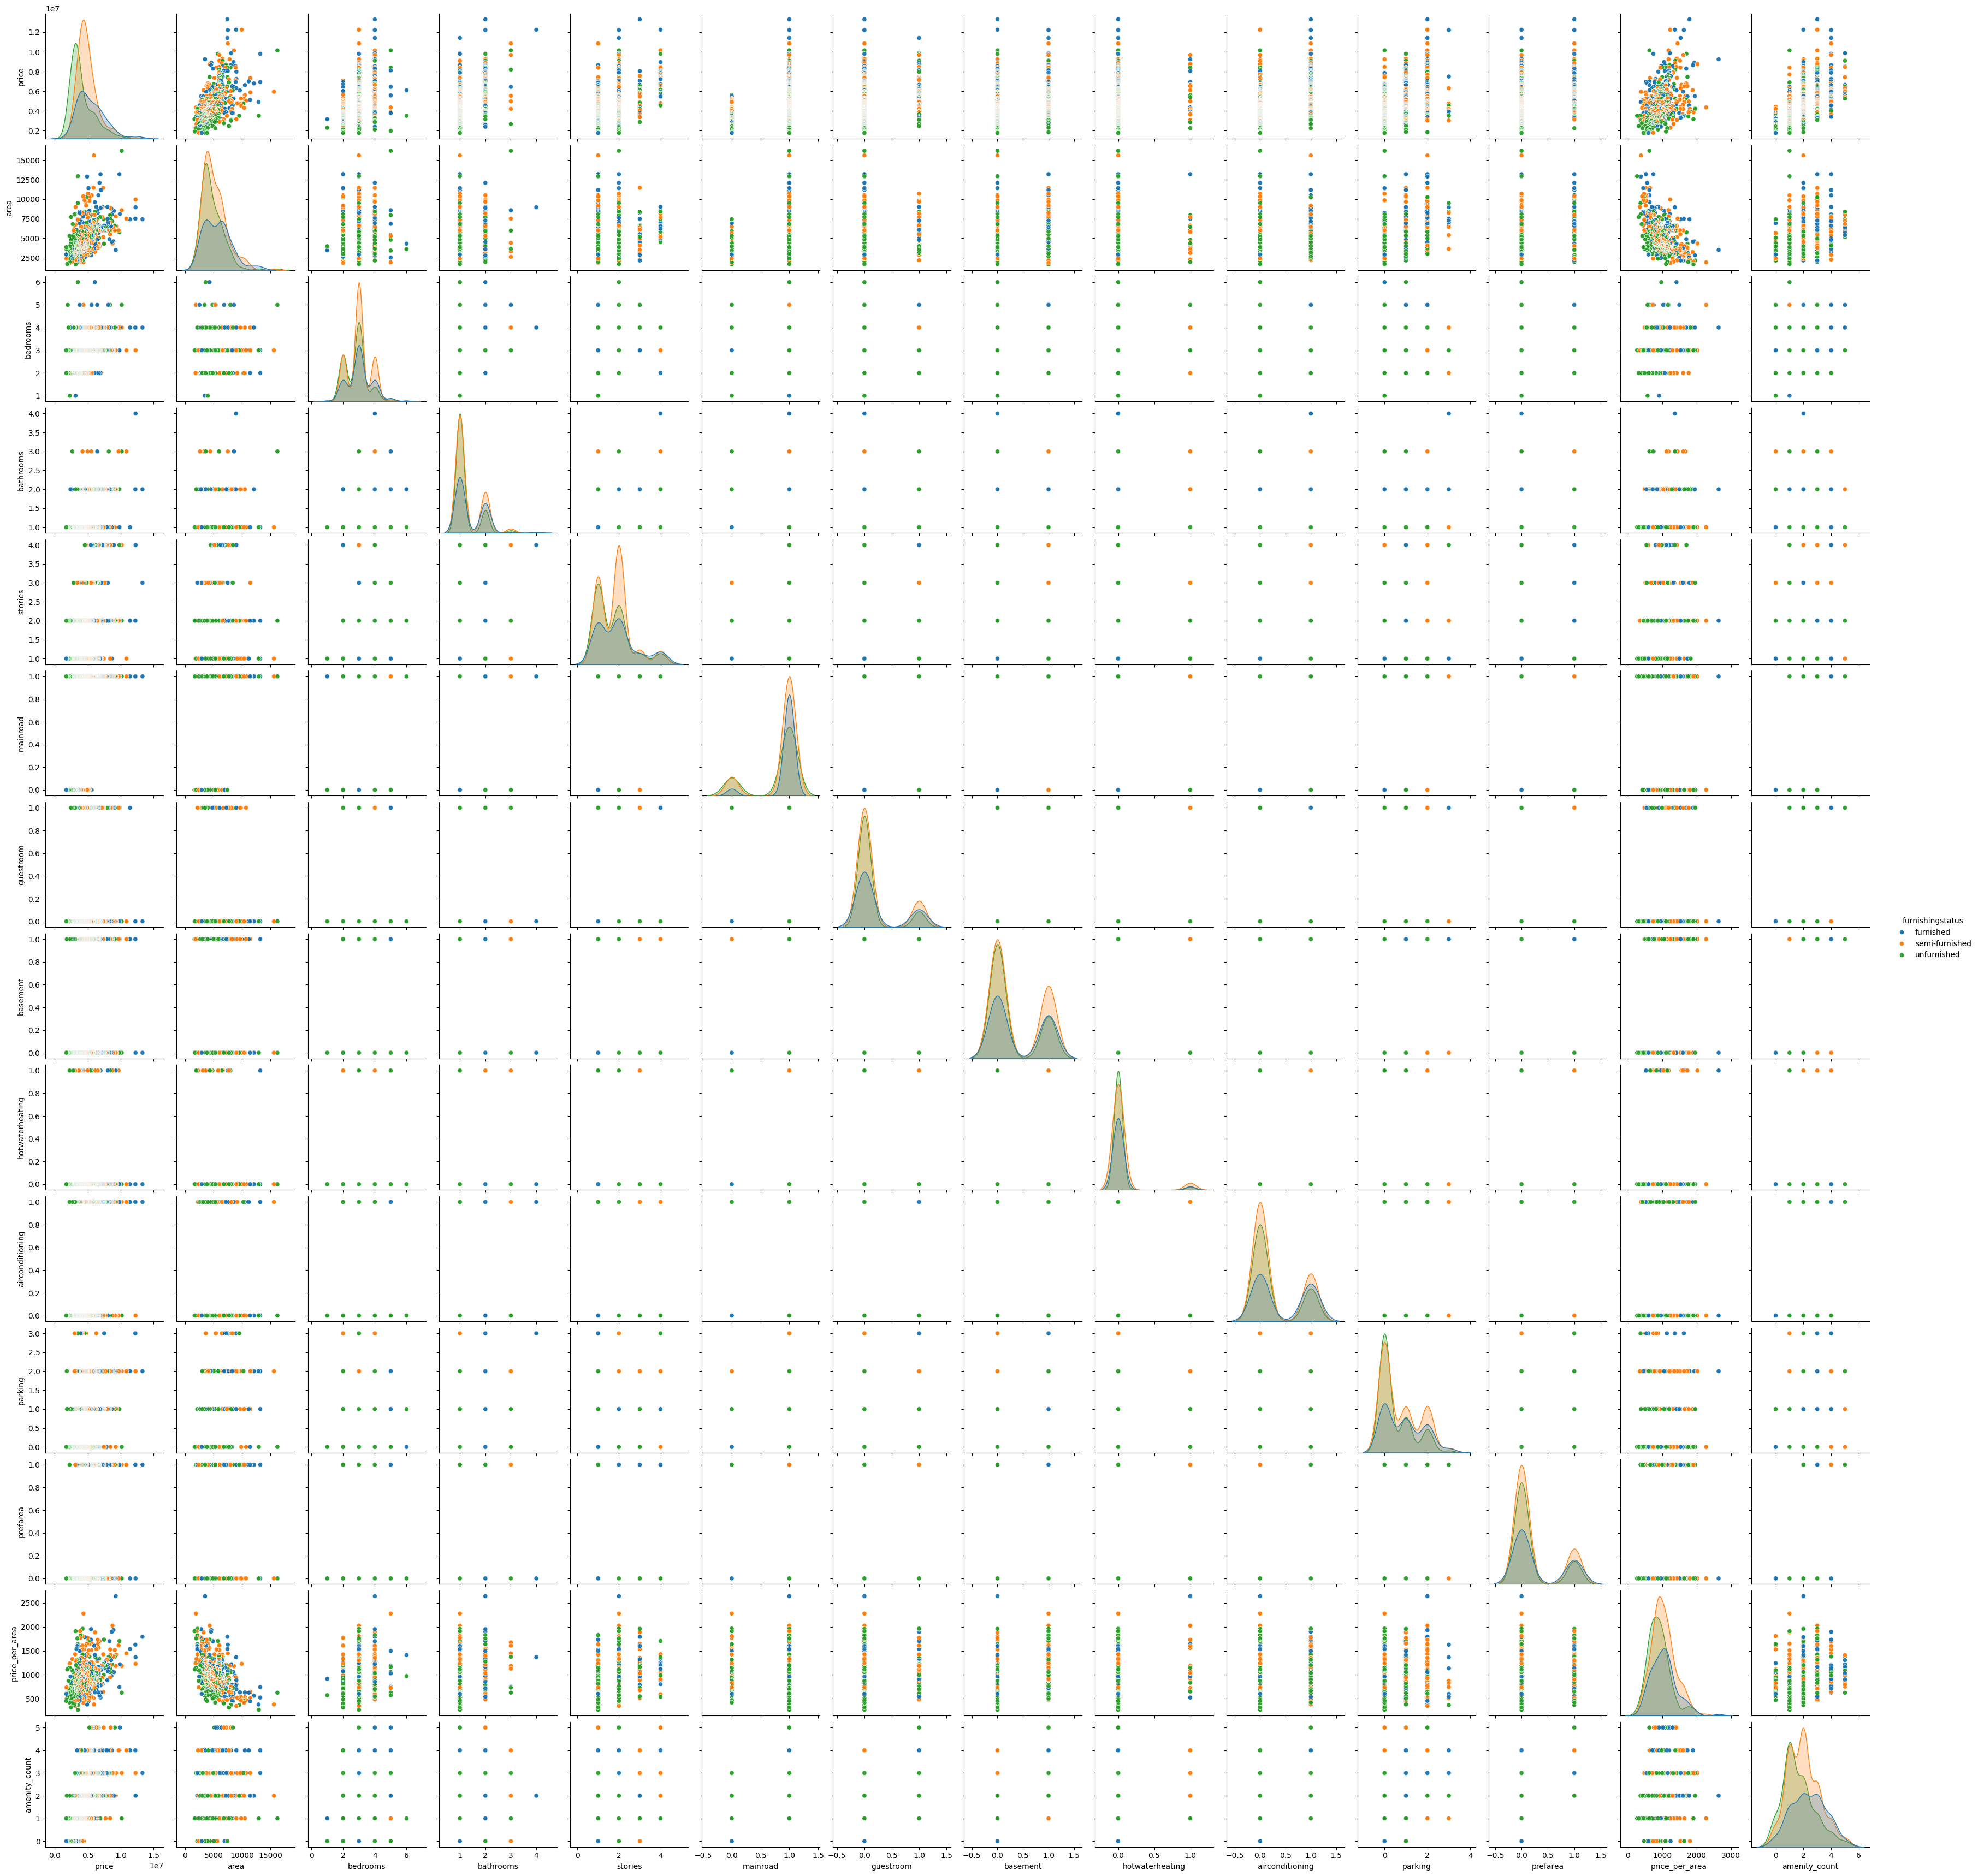

In [100]:
# Pairplot to see feature relationships
sns.pairplot(data, hue='furnishingstatus')
plt.show()

In [166]:
# Convert furnishingstatus to dummy variable
data = pd.get_dummies(data, columns=['furnishingstatus'], drop_first=True)
data.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                            False                         False  
2                             True                         False  
3                            False                         False  
4                            False                         False

In [167]:
#Make sure new columns are integers
data['furnishingstatus_semi-furnished'] = data['furnishingstatus_semi-furnished'].astype(int)
data['furnishingstatus_unfurnished'] = data['furnishingstatus_unfurnished'].astype(int)
data.head()

price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                                0                             0  
1                                0                             0  
2                                1                             0  
3                                0                             0  
4                                0                             0

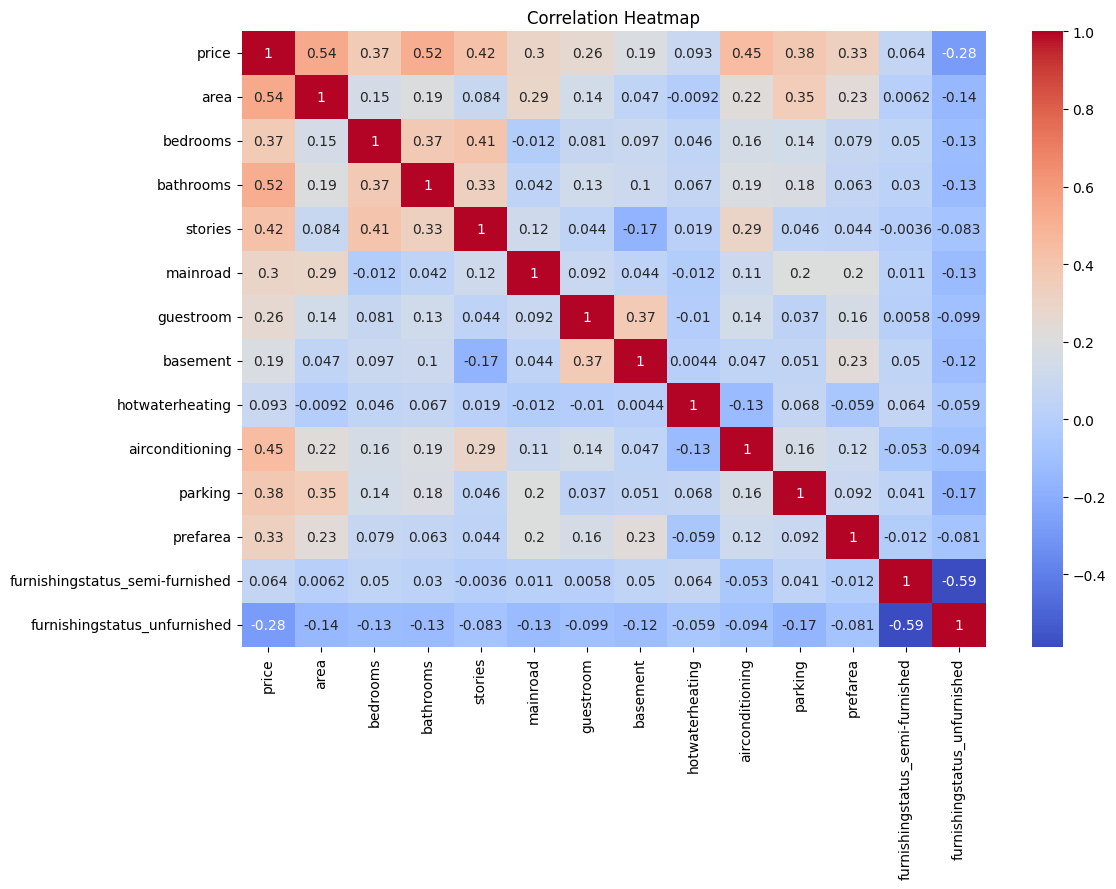

In [168]:
# Visualize correlations heatmap
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [169]:
#Import required Python libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [170]:
# Prepare features and target (in this situation you can change the features)
X = data.drop('price', axis=1) #features
#X = data.drop(columns=['price','bedrooms','guestroom','mainroad','basement','guestroom','hotwaterheating','parking','furnishingstatus_semi-furnished','furnishingstatus_unfurnished'])
y = data['price'] # target

In [171]:
# Split the dataset into train-test (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [172]:
# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [173]:
# Coefficients and intercept
print("Intercept:", model.intercept_)
coef_data = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coef_data)
#y = Wx+b
#price = W1X1+W2X2+W3X3+.....+WnXn+b

Intercept: 260032.35760741495
                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
mainroad                         3.679199e+05
guestroom                        2.316100e+05
basement                         3.902512e+05
hotwaterheating                  6.846499e+05
airconditioning                  7.914267e+05
parking                          2.248419e+05
prefarea                         6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05


In [174]:
# Predictions
prediction = model.predict(X_test)
prediction

array([5164653.90033967, 7224722.29802166, 3109863.24240338,
       4612075.3272256 , 3294646.25725955, 3532275.09556559,
       5611774.56836476, 6368145.98732718, 2722856.95689985,
       2629405.61585782, 9617039.5031558 , 2798087.30447888,
       3171096.76847064, 3394639.09125528, 3681088.65424275,
       5263187.74621485, 3035963.47612384, 4786122.8004005 ,
       4349551.9200572 , 3572362.09930451, 5774875.21395649,
       5886993.57919883, 2730836.19518458, 4727316.47323635,
       5244847.52716801, 7555324.21605603, 3220790.84680268,
       5191898.79934206, 8143726.91009786, 3398814.09825035,
       6490693.05027925, 3315105.9074781 , 6708457.36761326,
       4201738.21071676, 3557571.06735186, 5836974.50478626,
       4808660.67448475, 4362878.73613261, 3191242.95701508,
       4596554.93225238, 4566042.86048411, 3517779.52374148,
       7205844.79365835, 3983597.27861103, 3749338.70271056,
       4274731.09125896, 6757442.10783741, 4037320.43665851,
       3769334.90397126,

In [175]:
y_test

316    4060000
77     6650000
360    3710000
90     6440000
493    2800000
        ...   
15     9100000
357    3773000
39     7910000
54     7350000
155    5530000
Name: price, Length: 109, dtype: int64

In [176]:
# Evaluate model performance
print("R2 Score:", r2_score(y_test, prediction)) # # How well model fits (1 = perfect)
# R² = 1 - ( Σ(y - y_pred)² / Σ(yi - y_mean)² )

R2 Score: 0.6529242642153184


In [177]:
print("MAE:",mean_absolute_error(y_test, prediction)) # Average error size
# MAE = (1/n) * Σ |y - y_pred|

MAE: 970043.4039201641


In [178]:
print("MSE:",mean_squared_error(y_test, prediction)) # Squared error size
# MSE = (1/n) * Σ (y - y_pred)²

MSE: 1754318687330.664


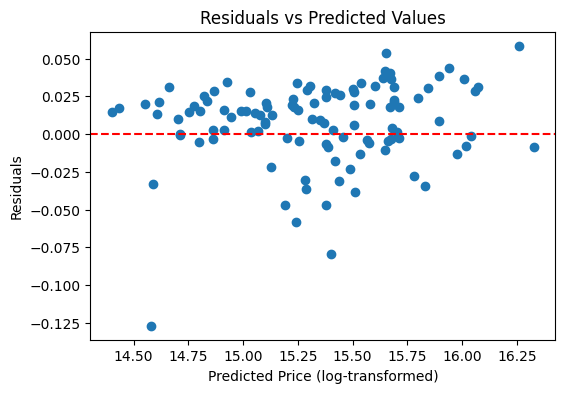

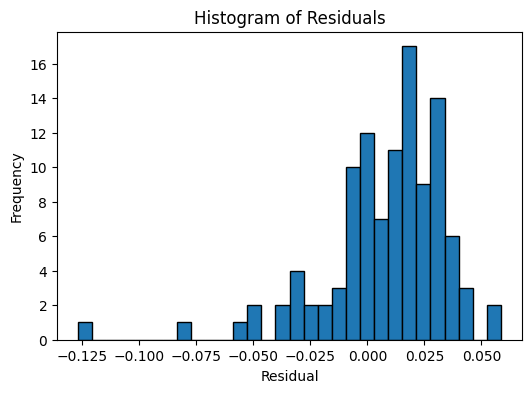

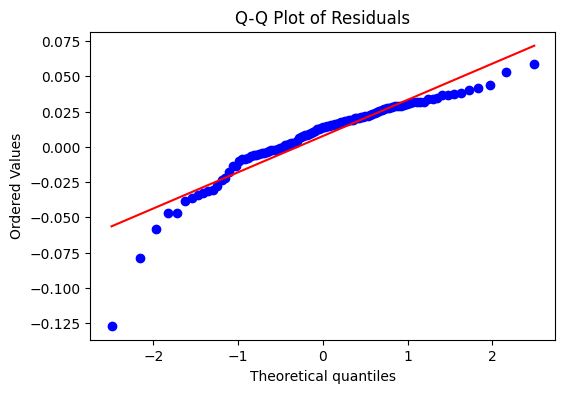

In [144]:
# Calculate residuals
residuals = y_test - prediction

# Residual plot: residuals vs predicted values
plt.figure(figsize=(6,4))
plt.scatter(prediction, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price (log-transformed)')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# Optional: Histogram of residuals to check normality
plt.figure(figsize=(6,4))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

# Optional: Q-Q plot for residual normality
import scipy.stats as stats
plt.figure(figsize=(6,4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()
#There is no overfitting and underfitting. Model fits the data almost perfectly.

In [13]:
#Summary

In [43]:
# When the feature X columns is not changing like in dataset : R2 Score: 0.6529242642153184, MAE: 970043.4039201641 and MSE: 1754318687330.664
# Model will be underfitting
# In this code.. I create the two new columns to get more accurancy

    # Found 3 outliers
# There is no romove outliers : If you don't want to remove you must skip ##Log transform price and area to reduce skewness## the whole cell
# Model accurancy is R2 score = 0.8838, MAE = 504031.7775 and MSE = 587217091347.0668
# If you remove outliers :
# Model accurancy is R2 score = 0.9956676649968584, MAE = 0.021634748556306028 and MSE = 0.0007835046311471007
# features X selecting model : R2 Score: 0.9958271571215365, MAE: 0.021746294194549126, MSE: 0.0007546604124460752

#price_per_area	feature is most important matter
# I would like to suggest to use regularization model because the dataset is abnomarl.
